<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/ArvoreDeDecisao-IA/blob/main/Questao2/CondicaoDeObesidadeBiblioteca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd # para trabalhar com a planilha
import numpy as np # para calculos 
base_risco_obesidade = pd.read_csv('Condicao_de_obesidade.csv')
base_risco_obesidade

,Come,Vegetariano,Idade,Diabetico,Classe
0,pouco,sim,velho,sim,magro
1,medio,sim,velho,nao,magro
2,muito,nao,velho,sim,gordo
3,pouco,nao,velho,nao,magro
4,medio,nao,jovem,sim,gordo
5,pouco,sim,jovem,nao,magro
6,muito,nao,velho,nao,gordo
7,medio,nao,jovm,sim,gordo


In [3]:
#Pre-processamento dos dados
x_risco_obesidade = base_risco_obesidade.iloc[:, 0:4].values
x_risco_obesidade #mostra todos os atributos com excessao da clase

array([['pouco', 'sim', 'velho', 'sim'],
       ['medio', 'sim', 'velho', 'nao'],
       ['muito', 'nao', 'velho', 'sim'],
       ['pouco', 'nao', 'velho', 'nao'],
       ['medio', 'nao', 'jovem', 'sim'],
       ['pouco', 'sim', 'jovem', 'nao'],
       ['muito', 'nao', 'velho', 'nao'],
       ['medio', 'nao', 'jovm', 'sim']], dtype=object)

In [4]:
#Pre-processamento dos dados
y_risco_obesidade = base_risco_obesidade.iloc[:, 4].values
y_risco_obesidade #mostrar classe

array(['magro', 'magro', 'gordo', 'magro', 'gordo', 'magro', 'gordo',
       'gordo'], dtype=object)

In [5]:
#Pre-processamento dos dados
from sklearn.preprocessing import LabelEncoder
label_encoder_come = LabelEncoder()
label_encoder_vegetariano = LabelEncoder()
label_encoder_idade = LabelEncoder()
label_encoder_diabetico = LabelEncoder()

In [6]:
#Pre-processamento dos dados
x_risco_obesidade[:, 0] = label_encoder_come.fit_transform(x_risco_obesidade[:, 0])
x_risco_obesidade[:, 1] = label_encoder_vegetariano.fit_transform(x_risco_obesidade[:, 1])
x_risco_obesidade[:, 2] = label_encoder_idade.fit_transform(x_risco_obesidade[:, 2])
x_risco_obesidade[:, 3] = label_encoder_diabetico.fit_transform(x_risco_obesidade[:, 3])

In [7]:
x_risco_obesidade

array([[2, 1, 2, 1],
       [0, 1, 2, 0],
       [1, 0, 2, 1],
       [2, 0, 2, 0],
       [0, 0, 0, 1],
       [2, 1, 0, 0],
       [1, 0, 2, 0],
       [0, 0, 1, 1]], dtype=object)

In [8]:
# salvando os dados pre-processados
import pickle
with open('risco_obesidade.pkl', 'wb') as f:
  pickle.dump([x_risco_obesidade, y_risco_obesidade], f)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
import pickle
with open('risco_obesidade.pkl', 'rb') as f:  # abrindo o arquivo já pre-processado
  x_risco_obesidade, y_risco_obesidade = pickle.load(f)


In [10]:
x_risco_obesidade

array([[2, 1, 2, 1],
       [0, 1, 2, 0],
       [1, 0, 2, 1],
       [2, 0, 2, 0],
       [0, 0, 0, 1],
       [2, 1, 0, 0],
       [1, 0, 2, 0],
       [0, 0, 1, 1]], dtype=object)

In [11]:
y_risco_obesidade

array(['magro', 'magro', 'gordo', 'magro', 'gordo', 'magro', 'gordo',
       'gordo'], dtype=object)

In [16]:
#Criando a arvore de decisao com o criterio da entropia
arvore_risco_obesidade = DecisionTreeClassifier(criterion='entropy')
arvore_risco_obesidade.fit(x_risco_obesidade, y_risco_obesidade)

DecisionTreeClassifier(criterion='entropy')

In [18]:
#Aqui eh realizado o calculo dos atributos com maiores ganho de informacao
#Perceba que o que apresenta maior ganho de informacao eh o que esta mais a esquerda, localizado na primeira posicao
#do array. No caso 'come' eh o atributo com maior ganho de informacao.
#Ranking dos maiores ganhos
# 1 -> Come = 0.54879494
# 2 -> Vegetariano = 0.45120506
# 3 -> Idade = 0.0
# 4 -> Diabetico = 0.0
#Sendo assim, a 'come' sera a raiz da nossa arvore
arvore_risco_obesidade.feature_importances_

array([0.54879494, 0.45120506, 0.        , 0.        ])

[Text(0.6, 0.8333333333333334, 'Come <= 1.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = gordo'),
 Text(0.4, 0.5, 'Vegetariano <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = gordo'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = gordo'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = magro'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = magro')]

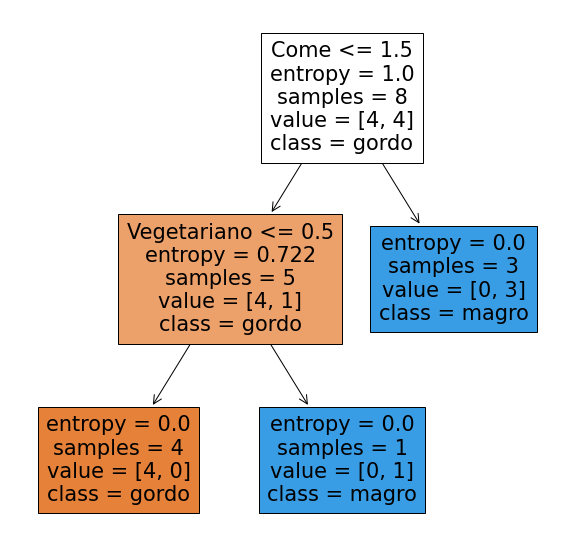

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['Come', 'Vegetariano', 'Idade', 'Diabetico']
figura, eixos = plt.subplots(nrows = 1, ncols =1, figsize=(10,10))
tree.plot_tree(arvore_risco_obesidade, feature_names=previsores, class_names = arvore_risco_obesidade.classes_, filled= True)